<a href="https://colab.research.google.com/github/graciemwilliams/wrangling/blob/main/assignment_wrangling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Data Wrangling
### `! git clone https://github.com/ds4e/wrangling`
### Do Q1 and Q2, and either Q3 or Q4, for a total of 3 questions.

**Q1.** This question provides some practice cleaning variables which have common problems.

**Part 1**

In [75]:
import pandas as pd
import numpy as np

from google.colab import files
uploaded = files.upload()

data = pd.read_csv('airbnb_hw.csv')
data.head()

Saving airbnb_hw.csv to airbnb_hw.csv


,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [78]:
# part 1
# clean the price variable by removing commas so it is not read as a string
data['Price'] = data['Price'].str.replace(',', '')

# check if $ are in the price column at all
data['Price'].str.contains('\$').value_counts()

# remove any missing values from the price column
data.dropna(subset=['Price'], inplace=True)

# how many missing values are there
data['Price'].isna().sum()

0

**Part 2**

In [79]:
from google.colab import files
uploaded = files.upload()

data = pd.read_csv('mn_police_use_of_force.csv')
data.head()

Saving mn_police_use_of_force.csv to mn_police_use_of_force.csv


,response_datetime,problem,is_911_call,primary_offense,subject_injury,force_type,force_type_action,race,sex,age,type_resistance,precinct,neighborhood
0,2016/01/01 00:47:36,Assault in Progress,Yes,DASLT1,NaN,Bodily Force,Body Weight to Pin,Black,Male,20.0,Tensed,1,Downtown East
1,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,Black,Female,27.0,Verbal Non-Compliance,1,Downtown West
2,2016/01/01 02:19:34,Fight,No,DISCON,NaN,Chemical Irritant,Personal Mace,White,Female,23.0,Verbal Non-Compliance,1,Downtown West
3,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West
4,2016/01/01 02:28:48,Fight,No,PRIORI,NaN,Chemical Irritant,Crowd Control Mace,Black,Male,20.0,Commission of Crime,1,Downtown West


In [80]:
# part 2
# find the proportion of values in subject_injury that are NA
(data['subject_injury'].isna().sum())/(data['subject_injury'].size)

 # remove the NA values from the subject_injury column
data.dropna(subset=['subject_injury'], inplace=True)

# cross tab subject injury with force type variable
pd.crosstab(data['subject_injury'], data['force_type'])

force_type,Baton,Bodily Force,Chemical Irritant,Firearm,Gun Point Display,Improvised Weapon,Less Lethal Projectile,Police K9 Bite,Taser
subject_injury,,,,,,,,,
No,0,1093,131,2,33,34,1,2,150
Yes,2,1286,41,0,44,40,2,44,172


The proportion of the NA values in subject_injury before cleaning the data is 76% which is concerning. When cross-tabulating with the force_type variable a pattern does emerger that the data is missing with force_types of baton, firearms, and less lethal projectile. The data for gun point display, improvised weapon, and police K9 bite also seem pretty low proportions compared to bodily force and taser.

**Part 3**

In [81]:
# read in the data
url = 'http://www.vcsc.virginia.gov/pretrialdataproject/October%202017%20Cohort_Virginia%20Pretrial%20Data%20Project_Deidentified%20FINAL%20Update_10272021.csv'
df = pd.read_csv(url,low_memory=False)
df.head()

,InternalStudyID,REQ_REC#,Defendant_Sex,Defendant_Race,Defendant_BirthYear,Defendant_Age,Defendant_AgeGroup,Defendant_AgeatCurrentArrest,Defendant_AttorneyTypeAtCaseClosure,Defendant_IndigencyStatus,...,NewFelonySexualAssaultArrest_OffDate,NewFelonySexualAssaultArrest_ArrestDate,NewFelonySexualAssaultArrest_DaysBetweenContactEventandOffDate,NewFelonySexualAssaultArrest_DaysBetweenOffDateandArrestDate,NewFelonySexualAssaultArrest_DaysBetweenReleaseDateandOffDate,NewFelonySexualAssaultArrest_Disposition,Intertnalindicator_ReasonforExcludingFromFollowUpAnalysis,CriminalHistoryRecordsReturnedorCMSRecordsFoundforIndividual,DispRecordFoundforChargesinOct2017Contact_Atleast1dispfound,CrimeCommission2021ReportClassificationofDefendants
0,ADI00001,1,M,W,1986,31,3,31,99,99,...,,,,999,999,,4,1,0,Defendant could not be classified or tracked d...
1,ADI00007,3,M,B,1956,60,6,60,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
2,ADI00008,4,M,W,1990,27,3,27,9,9,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
3,CDI00036,6,M,B,1989,27,3,27,0,0,...,,,,999,999,,5,1,1,Defendant Detained Entire Pre-Trial Period_Und...
4,CDI00038,7,F,W,1988,28,3,28,0,0,...,,,,999,999,,0,1,1,New criminal offense punishable by incarcerati...


In [82]:
print(df['SentenceTypeAllChargesAtConvictionInContactEvent'].value_counts())
print(df['ImposedSentenceAllChargeInContactEvent'].value_counts())

SentenceTypeAllChargesAtConvictionInContactEvent
4    8779
0    8720
1    4299
2     914
9     274
Name: count, dtype: int64
ImposedSentenceAllChargeInContactEvent
                    9053
0                   4953
12                  1404
.985626283367556    1051
6                    809
                    ... 
49.9712525667351       1
57.0349075975359       1
79.9260780287474       1
42.1642710472279       1
1.6570841889117        1
Name: count, Length: 484, dtype: int64


In [84]:
# clean the whether defendant was released pretrial variable by replacing missing values with np.nan
df['WhetherDefendantWasReleasedPretrial'].replace(' ', np.nan, inplace=True)

# change the 9 values to 1 because it seems to only be a binary choice of 0 and 1
df['WhetherDefendantWasReleasedPretrial'].replace(9, 1, inplace=True)
print(df['WhetherDefendantWasReleasedPretrial'].value_counts())

WhetherDefendantWasReleasedPretrial
1    19185
0     3801
Name: count, dtype: int64


<ipython-input-84-a59d2b222ebf>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WhetherDefendantWasReleasedPretrial'].replace(' ', np.nan, inplace=True)
<ipython-input-84-a59d2b222ebf>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

**Part 4**

In [96]:
# Replace spaces with NaN
df['ImposedSentenceAllChargeInContactEvent'].replace(' ', np.nan, inplace=True)

# Convert the column to numeric
df['ImposedSentenceAllChargeInContactEvent'] = pd.to_numeric(df['ImposedSentenceAllChargeInContactEvent'], errors='coerce')

# Round the values to the nearest whole number
df['ImposedSentenceAllChargeInContactEvent'] = df['ImposedSentenceAllChargeInContactEvent'].round()

print(df['SentenceTypeAllChargesAtConvictionInContactEvent'].value_counts())

# change the variables to either a 4, 0, 1, 2, or 9 as is shown in the sentence type all charges variable
# used AI to figure out this
valid_categories = [4, 0, 1, 2, 9]
# Map the values to the nearest valid category
df['ImposedSentenceAllChargeInContactEvent'] = df['ImposedSentenceAllChargeInContactEvent'].apply(
    lambda x: min(valid_categories, key=lambda v: abs(v - x)) if pd.notna(x) else np.nan
)

print(df['ImposedSentenceAllChargeInContactEvent'].value_counts())

SentenceTypeAllChargesAtConvictionInContactEvent
4    8779
0    8720
1    4299
2     914
9     274
Name: count, dtype: int64
ImposedSentenceAllChargeInContactEvent
0.0    5702
9.0    4813
4.0    1921
1.0    1130
2.0     367
Name: count, dtype: int64


<ipython-input-96-dc95a6fa4bb5>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ImposedSentenceAllChargeInContactEvent'].replace(' ', np.nan, inplace=True)


**Q2.** Go to https://sharkattackfile.net/ and download their dataset on shark attacks.

**Part 1**

In [99]:
import pandas as pd
import numpy as np
# open the excel file using pandas
from google.colab import files
uploaded = files.upload()

df = pd.read_excel('attacks.xls')

Saving attacks.xls to attacks (5).xls


In [100]:
df.head()

,Date,Year,Type,Country,State,Location,Activity,Name,Sex,Age,...,Species,Source,pdf,href formula,href,Case Number,Case Number.1,original order,Unnamed: 21,Unnamed: 22
0,2025-01-23 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Shipwreck Cove,Bathing,Boy,M,12,...,Not stated,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2025-01-22 00:00:00,2025.0,Unprovoked,Australia,Western Australia,Cheynes beach,Surfing,Dale Kittow,M,37,...,Bronze whaler,Bob Myatt GSAF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-01-11 00:00:00,2025.0,Provoked,USA,Hawaii,Off Haleiwa Boat Harbour Oahu,Diving,Male not stated was a dive tour worker,M,23,...,Not stated,Kevin McMurray Trackingsharks.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2025-01-02 00:00:00,2025.0,Unprovoked,New Caledonia,Grande Terre,Islet of Kendek near Koumac,Spearfishing,Robert Cuewapuru,M,40,...,Reportedly Tiger or Bull shark,Johannes Marchand Todd Smith,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2025-01-02 00:00:00,2025.0,Unprovoked,Australia,South Australia,Granites Beach near Westall Streaky Bay,Surfing,Lance Appleby,M,28,...,Great White Shart estimated 4.8m 16 ft,Glen Folkard: Simon De Marchi News.com.au: The...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Part 2**

In [101]:
# drop the columns that contain Nan
df.dropna(axis=1, how='all', inplace=True)
print(df.shape)

# didn't change anything so will now drop the columns that contain mainly NaN
threshold = 0.5
df = df.dropna(axis=1, thresh=int(threshold * len(df)))

print(df.shape)


(6992, 23)
(6992, 20)


**Part 3**

In [102]:
# remove NA values from the data frame
df.dropna(subset=['Year'], inplace=True)

# convert to an integer to remove the decimal point
df['Year'] = df['Year'].astype(int)

# remove the values that are 0
df = df[df['Year'] != 0]

# remove 2026
df = df[df['Year'] != 2026]

print(df['Year'].describe())

# Filter the rows to focus on attacks since 1940.
df = df[df['Year'] >= 1940]

# check the amount of attacs by year from 1940 to present in chronological order
print(df['Year'].value_counts().sort_index())


count    6860.000000
mean     1971.392711
std        60.721854
min         5.000000
25%      1950.000000
50%      1987.000000
75%      2010.000000
max      2025.000000
Name: Year, dtype: float64
Year
1940     24
1941     27
1942     41
1943     28
1944     31
       ... 
2021    109
2022     98
2023    109
2024     49
2025      6
Name: count, Length: 86, dtype: int64


The range of values is from 0 to 2026. 50% of the values are between 1969 and 2013. The average value is 1991. The number of attacks reported looks to be significantly greater now than it was in 1940.

**Part 4**

<Axes: >

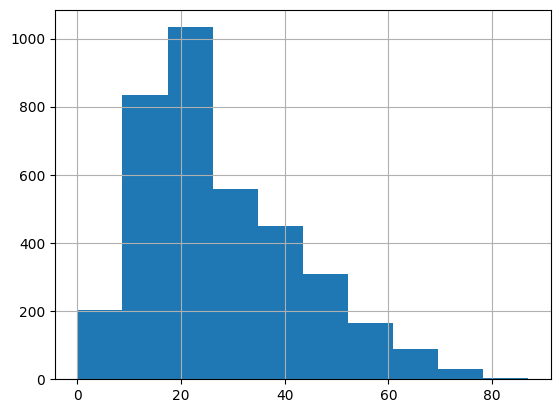

In [103]:
# clean the age variable by remove NA values
df.dropna(subset=['Age'], inplace=True)

# replace values such at 60+ with the integer
# convert to str first
df['Age'] = df['Age'].astype(str)
df['Age'] = df['Age'].str.replace('+', '').str.strip()

# change to an integer
df['Age'] = pd.to_numeric(df['Age'], errors='coerce').fillna(0).astype(int)

# make a histogram of the ages of the victims
df['Age'].hist()

**Part 5**

In [104]:
# find the proportion of male victims in the Sex column
df['Sex'].value_counts(normalize=True)['M']

0.8431318681318681

**Part 6**

In [105]:
# Clean the Type variable so it only takes three values: Provoked and Unprovoked and Unknown
df['Type'].value_counts()

# change values other than uprovoked and provoked to unknown
df['Type'] = df['Type'].apply(lambda x: x if x in ['Unprovoked', 'Provoked'] else 'Unknown')
df['Type'].value_counts()

# find percent that are unprovoked
df['Type'].value_counts(normalize=True)['Unprovoked']

0.8273987496602337

**Part 7**

In [106]:
df['Fatal Y/N'].value_counts()
# Clean the Fatal Y/N variable so it only takes three values: Y, N, and Unknown.
df['Fatal Y/N'] = df['Fatal Y/N'].apply(lambda x: x if x in ['Y', 'N'] else 'Unknown')
df['Fatal Y/N'].value_counts()



,count
Fatal Y/N,
N,2911
Y,533
Unknown,235


**Part 8**

In [107]:
# find the percentage of unprovoked attacks on men vs women
print(df[df['Sex'] == 'M']['Type'].value_counts(normalize=True))
print(df[df['Sex'] == 'F']['Type'].value_counts(normalize=True))

Type
Unprovoked    0.822418
Provoked      0.089606
Unknown       0.087977
Name: proportion, dtype: float64
Type
Unprovoked    0.867958
Unknown       0.095070
Provoked      0.036972
Name: proportion, dtype: float64


In [108]:
# find the percentage of fatal attacks when an attack is unprovoked
print(df[df['Type'] == 'Unprovoked']['Fatal Y/N'].value_counts(normalize=True))

Fatal Y/N
N          0.829501
Y          0.162615
Unknown    0.007884
Name: proportion, dtype: float64


In [109]:
# find the percentage of fatal attacks when the attack is provoked
print(df[df['Type'] == 'Provoked']['Fatal Y/N'].value_counts(normalize=True))

Fatal Y/N
N          0.956811
Y          0.026578
Unknown    0.016611
Name: proportion, dtype: float64


In [110]:
# find the percentage of fatal attacks when the victim is male vs female
print(df[df['Sex'] == 'M']['Fatal Y/N'].value_counts(normalize=True))
print(df[df['Sex'] == 'F']['Fatal Y/N'].value_counts(normalize=True))

Fatal Y/N
N          0.791137
Y          0.146628
Unknown    0.062235
Name: proportion, dtype: float64
Fatal Y/N
N          0.797535
Y          0.133803
Unknown    0.068662
Name: proportion, dtype: float64


Sharks are more likely to launch unprovoked attacks on women. The attack is more likely to be fatal when it is unprovoked. The attack is slightly more likely to be fatal when the victim is male. All of this data makes me feel more scared of sharks because most of the attacks are unprovoked.

**Part 9**

In [111]:
# use str.split()
print(df['Species '].str.split().value_counts())

# find the proportion of attacks that appear to be by white sharks
df['Species '].str.contains('White').mean()

Species 
[White, shark]                                                                 108
[Shark, involvement, not, confirmed]                                            52
[Tiger, shark]                                                                  52
[Bull, shark]                                                                   52
[Shark, involvement, prior, to, death, was, not, confirmed]                     43
                                                                              ... 
[A, bull, shark,, according, to, some, of, the, divers, on, the, boat]           1
[Blacktip, shark,, 2m]                                                           1
[Mako, shark,, 90kg]                                                             1
[Possibly, a, hammerhead, shark]                                                 1
[White, shark,, 160-kg, [353-lb],, identity, confirmed, by, tooth, pattern]      1
Name: count, Length: 1096, dtype: int64


0.13372582001682085

**Q4.** Many important datasets contain a race variable, typically limited to a handful of values often including Black, White, Asian, Latino, and Indigenous. This question looks at data gathering efforts on this variable by the U.S. Federal government.

1. They used a self-reporting approach. They were able to select one or more categories from pre-defined catefories or could specify further under 'some other race'.

2. We gather this data because it helps to determine the distribution of federal funding for programs that can be allocated based on racial and ethnic breakdowns. Regarding politics, this data is important for the redrawing of electoral districts to ensure that political represenation is reflective of the demographics of the population.

3. One thing that was done well was that the Census allowed citizens to self-identify what race that they were to help provide more accurate data. Additionally, there was an option to select multiple races which improved the accuracy of the data. Due to covid, there were also more ways to access the census through phone or online. Some things that could be improved was reaching more hard to target groups such as immigrants or people in rural communities. Adjustments in the future could be done to allow for more detailed/customizable responses for the selection of race to reflect the nuances within some racial groups. Country of origin could be an option to add. The muliple reponse methods (digital and paper formats) could be used to gather more richer and more useful data in other survey settings.


4. The Census gathered data focused on biological sex, so it only had Male and Female. It did not ask a question for gender identity. Some criticism for this is that is could have resulted in underrepresenation of people who do not identify as male or female. A future solution could be to allow another option for gender identity.


5. In regards to sex, a concern would be that it results in forced categorization for people who do not identify as male or female. This could lead to inaccurate data. Missing values could result in the reponse not being counted and the population being underrepresented when the data is clean. Some good practices could be to leave the data as unkwon or allowing participants to opt out of questions they do not feel comfortable responding to.


6. I would have concerns over the accuracy of the data that doesn't represent people's self identification with things such as race or gender identity. There would be ethcial concerns if if misrepresented marginalized groups or create false data that is not accurate to the population.